In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('UCI HAR Dataset/csv_files/train.csv')
test = pd.read_csv('UCI HAR Dataset/csv_files/test.csv')

print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [5]:
X_train = train.drop(['subject', 'Activity', 'Activity Name'], axis=1)
y_train = train['Activity Name']


X_test = test.drop(['subject', 'Activity', 'Activity Name'], axis=1)
y_test = test['Activity Name']


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7352, 561) (7352,) (2947, 561) (2947,)


In [6]:
labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING DOWNSTAIRS', 'WALKING UPSTAIRS']

### Making models for prediction

#### Logistic Regression

In [7]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [20]:
parameters = {'C': [0.01, 0., 1, 10, 20, 30], 'penalty': ['l2', 'l1']}
log_reg = linear_model.LogisticRegression(random_state=0, max_iter=100)
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)

log_reg_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.91458247        nan        nan        nan 0.93688957        nan
 0.93389598        nan 0.93416942        nan 0.93294526        nan]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.0, 1, 10, 20, 30],
                         'penalty': ['l2', 'l1']},
             verbose=1)

In [21]:
y_pred = log_reg_grid.predict(X_test)
print("Accuracy = ",metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy =  0.9589412962334578


In [22]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[537   0   0   0   0   0]
 [  0 430  58   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 405  11]
 [  0   0   0  24   1 446]]


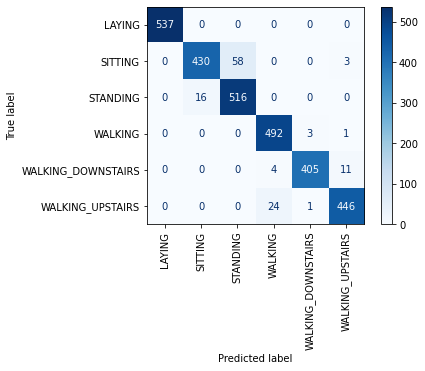

In [47]:
metrics.plot_confusion_matrix(log_reg_grid, X_test, y_test, cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

In [12]:
import itertools


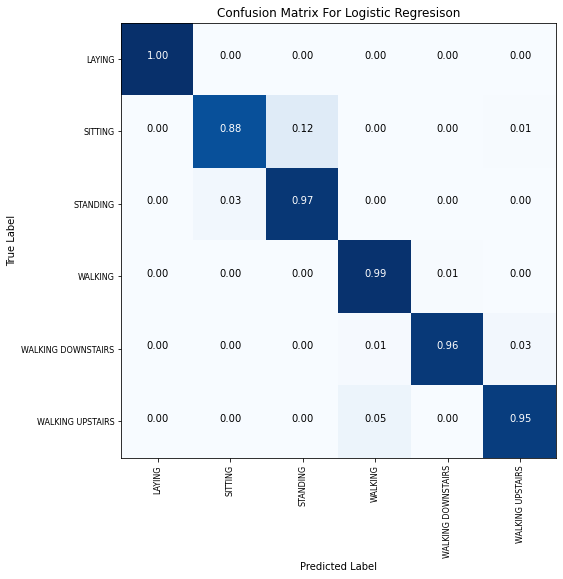

In [53]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '0.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.title("Confusion Matrix For Logistic Regresison")
plt.xticks(np.arange(len(labels)), labels, rotation=90, size=8)
plt.yticks(np.arange(len(labels)), labels, size=8)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

#### Linear SVC

In [48]:
from sklearn.svm import LinearSVC

In [54]:
parameters = {'C': [0.125, 0.250, 0.500, 0.750, 1, 1.500, 2, 5, 10]}
lr_svc = LinearSVC()

lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1)
lr_svc_grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.125, 0.25, 0.5, 0.75, 1, 1.5, 2, 5, 10]})

In [56]:
y_pred = lr_svc_grid.predict(X_test)
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Accuracy =  0.9670851713607058


In [57]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[537   0   0   0   0   0]
 [  2 430  56   0   0   3]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


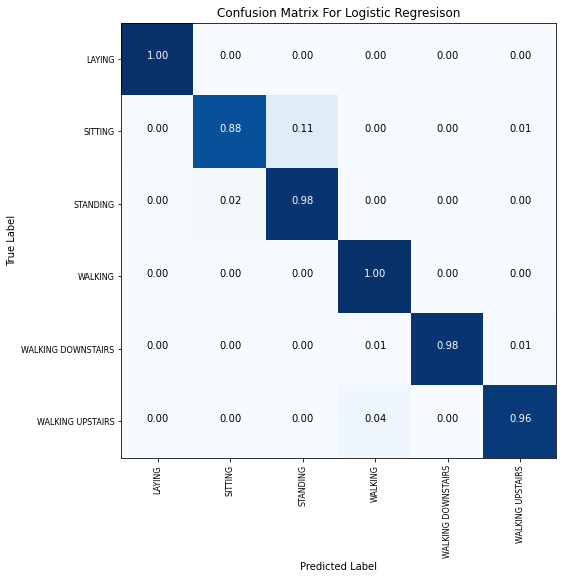

In [58]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '0.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.title("Confusion Matrix For Logistic Regresison")
plt.xticks(np.arange(len(labels)), labels, rotation=90, size=8)
plt.yticks(np.arange(len(labels)), labels, size=8)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [61]:
print(metrics.classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.88      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



#### Kernel SVM

In [8]:
from sklearn.svm import SVC

parameters = {'C': [2, 6, 8], 'gamma': [0.05, 0.125, 2]}

rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm, param_grid=parameters, n_jobs=-1)
rbf_svm_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [2, 6, 8], 'gamma': [0.05, 0.125, 2]})

In [9]:
y_pred = rbf_svm_grid.predict(X_test)
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Accuracy =  0.9613165931455717


In [10]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[537   0   0   0   0   0]
 [  2 451  37   0   0   1]
 [  0  15 517   0   0   0]
 [  0   0   0 480  12   4]
 [  0   0   0   5 391  24]
 [  0   0   0  11   3 457]]


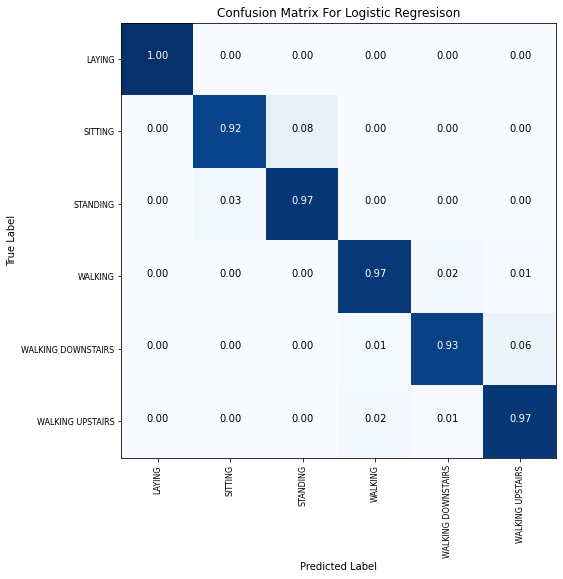

In [13]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '0.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.title("Confusion Matrix For Logistic Regresison")
plt.xticks(np.arange(len(labels)), labels, rotation=90, size=8)
plt.yticks(np.arange(len(labels)), labels, size=8)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [14]:
print(metrics.classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.92      0.94       491
          STANDING       0.93      0.97      0.95       532
           WALKING       0.97      0.97      0.97       496
WALKING_DOWNSTAIRS       0.96      0.93      0.95       420
  WALKING_UPSTAIRS       0.94      0.97      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [15]:
import xgboost

In [22]:
# parameters ={'eta': [0.25, 0.25, 0.75, 1]}
xgb = xgboost.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

# xgb_grid = GridSearchCV(estimator=xgb, param_grid=parameters)



In [23]:
xgb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:49:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [25]:
y_pred = xgb.predict(X_test)
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Accuracy =  0.9375636240244316


In [26]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[537   0   0   0   0   0]
 [  0 417  71   0   0   3]
 [  0  26 506   0   0   0]
 [  0   0   0 484   9   3]
 [  0   0   0   8 384  28]
 [  0   1   0  30   5 435]]


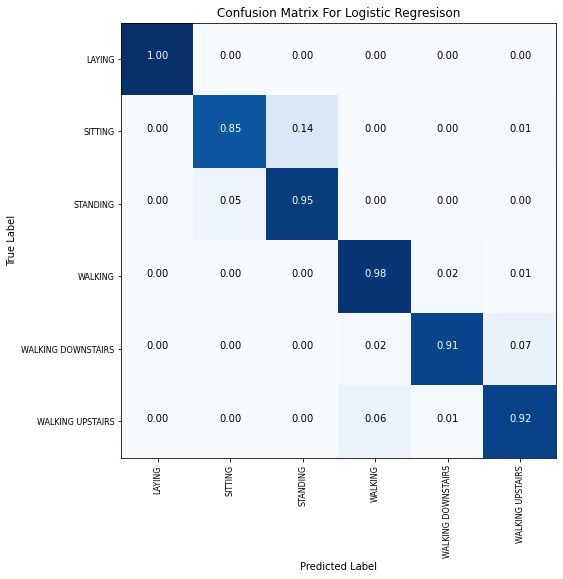

In [27]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '0.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.title("Confusion Matrix For Logistic Regresison")
plt.xticks(np.arange(len(labels)), labels, rotation=90, size=8)
plt.yticks(np.arange(len(labels)), labels, size=8)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [29]:
print(metrics.classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.85      0.89       491
          STANDING       0.88      0.95      0.91       532
           WALKING       0.93      0.98      0.95       496
WALKING_DOWNSTAIRS       0.96      0.91      0.94       420
  WALKING_UPSTAIRS       0.93      0.92      0.93       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947

